# Noisy gradient descent experiments
This notebook includes experiments for noisy gradient descent with partial and full covariance.

In [1]:
import jax.numpy as jnp
from jax import random
from noisy_gradient_descent import *

This test case approximates $y = x$ for $x \in [0,1]$

Iterations: 101/5000
Iterations: 201/5000
Iterations: 301/5000
Iterations: 401/5000
Iterations: 501/5000
Iterations: 601/5000
Iterations: 701/5000
Iterations: 801/5000
Iterations: 901/5000
Iterations: 1001/5000
Iterations: 1101/5000
Iterations: 1201/5000
Iterations: 1301/5000
Iterations: 1401/5000
Iterations: 1501/5000
Iterations: 1601/5000
Iterations: 1701/5000
Iterations: 1801/5000
Iterations: 1901/5000
Iterations: 2001/5000
Iterations: 2101/5000
Iterations: 2201/5000
Iterations: 2301/5000
Iterations: 2401/5000
Iterations: 2501/5000
Iterations: 2601/5000
Iterations: 2701/5000
Iterations: 2801/5000
Iterations: 2901/5000
Iterations: 3001/5000
Iterations: 3101/5000
Iterations: 3201/5000
Iterations: 3301/5000
Iterations: 3401/5000
Iterations: 3501/5000
Iterations: 3601/5000
Iterations: 3701/5000
Iterations: 3801/5000
Iterations: 3901/5000
Iterations: 4001/5000
Iterations: 4101/5000
Iterations: 4201/5000
Iterations: 4301/5000
Iterations: 4401/5000
Iterations: 4501/5000
Iterations: 4601/50

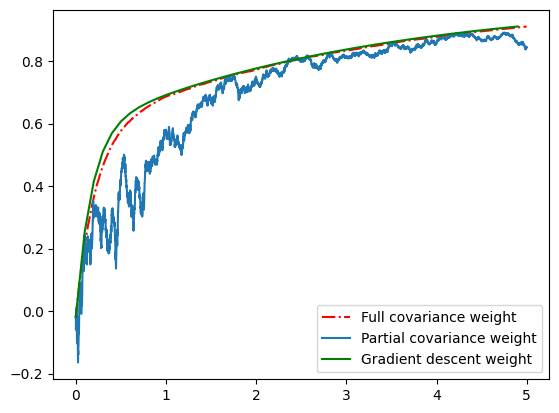

In [2]:
STEP_SIZE = 0.001
FINAL_TIME = 5.0
LEARNING_RATE = 0.1
noisy_gradient_descent_iterations = int(LEARNING_RATE / STEP_SIZE)

x = jnp.linspace(0.0, 2.0, 100).reshape((100, 1))
y = x

key = random.PRNGKey(4)
sizes = (1, 1)
parital_covariance_parameters = initialize_network_parameters(sizes, key)
full_covariance_parameters = initialize_network_parameters(sizes, key)
gradient_descent_parameters = initialize_network_parameters(sizes, key)
time = jnp.arange(0.0, FINAL_TIME, STEP_SIZE)
weight_full_covariance = []
weight_parital_covariance = []
weight_gradient_descent = []
iterations = 1
max_iterations = time.size

weight_full_covariance.append(parital_covariance_parameters[0][0][0])
weight_parital_covariance.append(full_covariance_parameters[0][0][0])
weight_gradient_descent.append(gradient_descent_parameters[0][0][0])

while True:
    key, subkey = random.split(key)
    for _ in range(noisy_gradient_descent_iterations):
        iterations += 1
        if iterations > max_iterations:
            break
        key, subkey = random.split(key)
        parital_covariance_parameters = full_covariance_update(
            subkey, parital_covariance_parameters, sizes, x, y, STEP_SIZE,
            LEARNING_RATE)
        weight_full_covariance.append(parital_covariance_parameters[0][0][0])

        key, subkey = random.split(key)
        full_covariance_parameters = partial_covariance_update(
            full_covariance_parameters, x, y, STEP_SIZE, LEARNING_RATE, subkey)
        weight_parital_covariance.append(full_covariance_parameters[0][0][0])

    if iterations > max_iterations:
        break
    gradient_descent_parameters = gradient_descent_update(
        gradient_descent_parameters, x, y, LEARNING_RATE)
    weight_gradient_descent.append(gradient_descent_parameters[0][0][0])
    print(f'Iterations: {iterations}/{max_iterations}')




plt.figure()
plt.plot(time,
         jnp.array(weight_full_covariance).flatten(),
         "r-.",
         label=f"Full covariance weight")
plt.plot(time,
         jnp.array(weight_parital_covariance).flatten(),
         label=f"Partial covariance weight")
plt.plot(time[::noisy_gradient_descent_iterations],
         jnp.array(weight_gradient_descent).flatten(),
         "g-",
         label=f"Gradient descent weight")
# plt.plot(t, jnp.array(b_sde).flatten(), label=f"sde b")
plt.legend()
# plt.savefig('sde_solver_behaving_weird.png')